In [2]:
import pandas as pd
import matplotlib.pyplot as plt

EVENTS_PATH = "../data/processed/events.parquet"
ML_PATH = "../data/processed/ml_table.parquet"
TEST_PRED_PATH = "../data/processed/test_predictions.csv"
CAL_PATH = "../data/processed/calibration_table.csv"


In [3]:
events = pd.read_parquet(EVENTS_PATH)
ml = pd.read_parquet(ML_PATH)
test_pred = pd.read_csv(TEST_PRED_PATH)
cal = pd.read_csv(CAL_PATH)

events["time"] = pd.to_datetime(events["time"], utc=True)
ml["day"] = pd.to_datetime(ml["day"], utc=True)
test_pred["day"] = pd.to_datetime(test_pred["day"], utc=True)

(events.shape, ml.shape, test_pred.shape, cal.shape)


((2509, 22), (9451, 12), (1447, 3), (7, 2))

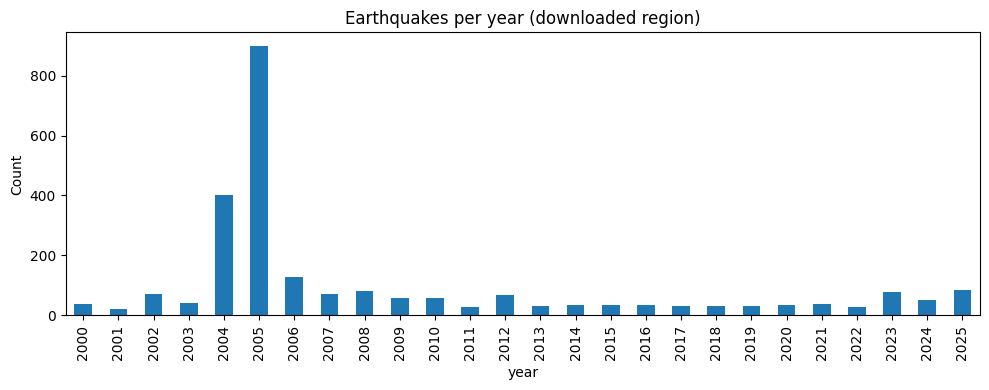

In [4]:
events["year"] = events["time"].dt.year
counts_year = events.groupby("year").size()

plt.figure(figsize=(10,4))
counts_year.plot(kind="bar")
plt.title("Earthquakes per year (downloaded region)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


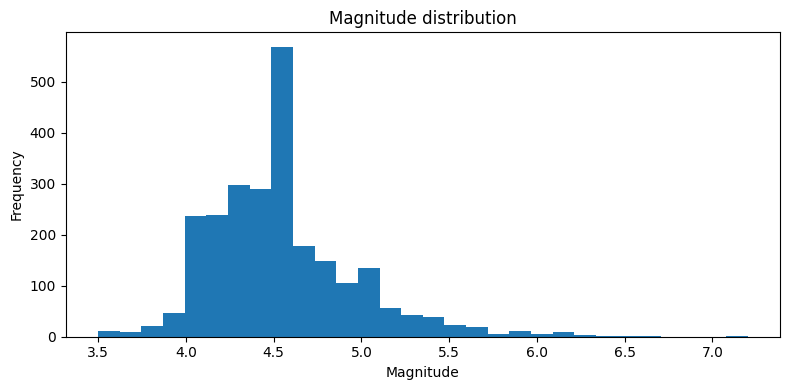

In [5]:
plt.figure(figsize=(8,4))
events["mag"].dropna().plot(kind="hist", bins=30)
plt.title("Magnitude distribution")
plt.xlabel("Magnitude")
plt.tight_layout()
plt.show()


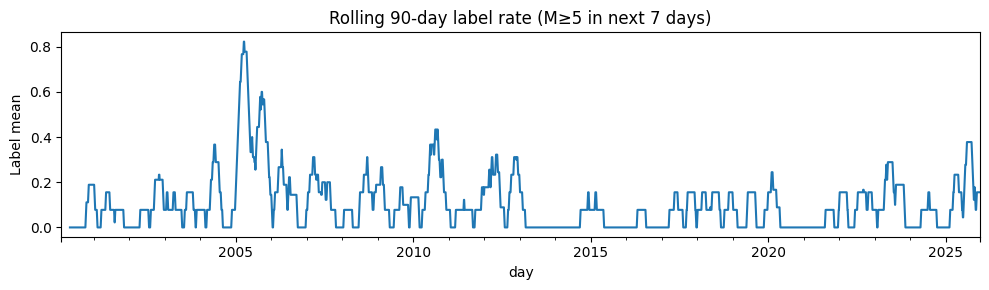

In [6]:
plt.figure(figsize=(10,3))
ml.set_index("day")["label"].rolling(90).mean().plot()
plt.title("Rolling 90-day label rate (M≥5 in next 7 days)")
plt.ylabel("Label mean")
plt.tight_layout()
plt.show()


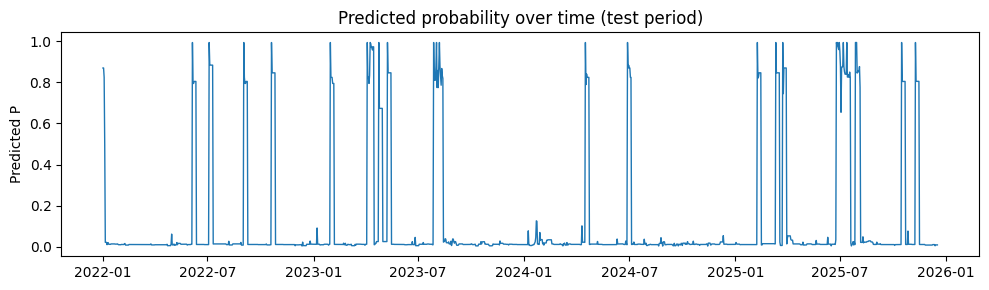

In [7]:
plt.figure(figsize=(10,3))
test_pred = test_pred.sort_values("day")
plt.plot(test_pred["day"], test_pred["p"], linewidth=1)
plt.title("Predicted probability over time (test period)")
plt.ylabel("Predicted P")
plt.tight_layout()
plt.show()


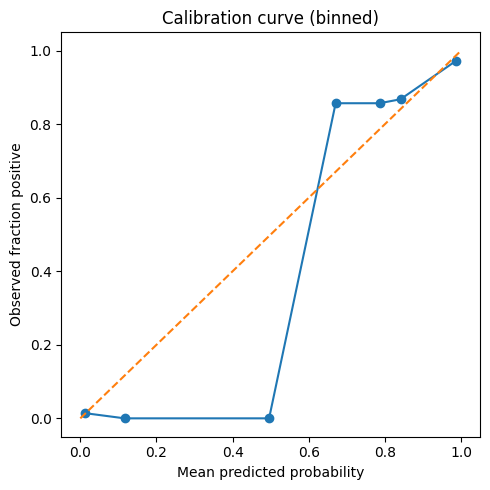

,mean_predicted_p,fraction_positive
0,0.012564,0.014073
1,0.116481,0.000000
2,0.495947,0.000000
3,0.670779,0.857143
4,0.786129,0.857143
5,0.841160,0.867925
6,0.987624,0.972973


In [8]:
plt.figure(figsize=(5,5))
plt.plot(cal["mean_predicted_p"], cal["fraction_positive"], marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Calibration curve (binned)")
plt.xlabel("Mean predicted probability")
plt.ylabel("Observed fraction positive")
plt.tight_layout()
plt.show()

cal
